In [1]:
# In this notebook, we will explore linear regression. 

## Definitions

In [2]:
# 1. Regression: A statistical term that is used to find relationships between variables (one dependant, one or more independant). 
# In machine learning and statistics, this relationship predicts outcome of a future event.

# 2. Loss function: A loss function is a mathematical function that measures how well or poorly a model’s predictions match the actual target values.
# Loss function for linear regression: most commonly mean squared error is used.

# 3. Properties of Linear regression:
#   - Supervised learning algorithm
#   - Easy to implement
#   - Good interpretability

# 4. Best fit line: This is the primary objective of LR. This line has least errors. The equation for this line provides a straight line to represent relation between variables.
# y = mx + c 
# y = m1x1 + m2x2 + m3x3 + ..... + c

## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## import dataset

In [4]:
#This dataset is the boston housing dataset downloaded through kaggle. Keep the dataset in the same folder as your .ipynb file so you can write its name otherwise you will have to put in the whole path.
#About the dataset (information from kaggle)
#The Boston Housing Dataset

# The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

In [5]:
#since the dataset doesnt have headings, we have to manually add them. Creating a list with the column headings.
columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT", "MEDV"]
data = pd.read_csv('housing.csv', header = None, sep=r"\s+",names=columns)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Linear regression implementation

In [6]:
from sklearn.model_selection import train_test_split #function to split data into training and testing data
from sklearn.metrics import mean_squared_error, r2_score #evaluation metrics for regression

In [7]:
# split features and target
x = data.drop('MEDV',axis = 1) #all features except target value
y = data['MEDV'] #target value

# NOTE: In pandas.DataFrame.drop():
# axis=0 → operate on rows (drop by row index)
# axis=1 → operate on columns (drop by column label)

In [8]:
# split training and testing data(dont change the order on LHS or youro utput will mess up)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
# NOTE: if you ever forget the order, use: help(train_test_split)

##test_size = 0.2 means 20% of the data is used for testing, this is equivalent to train_data = 0.8
##random_state = 42 this parameter controls the randomness of the experiment. Without using this, each time we run this line of code, it wil produce different train/test splits- leading to slightly different model performance
## why 42? just a common convention (a joke from The Hitchhiker’s Guide to the Galaxy: “the answer to life, the universe, and everything is 42”).(This amused me ALOT)
## you can use any number, like random_state = 1, 123, 17 etc. Each number gives different splits, but they will always be consistent for that number.
##Always set random_state when you want reproducibility.

In [9]:
# Fit linear regression (train this data on linear regression model)
model = LinearRegression() #create an instance of sklearn's LinearRegression class
model.fit(x_train,y_train) #train the given data on linear regression

LinearRegression()

In [10]:
# make predictions
y_pred = model.predict(x_test)

In [11]:
y_pred #print predicted median values of houses 

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

# Visualising the model on this dataset

### Scatter plot (actual vs predicted house prices)

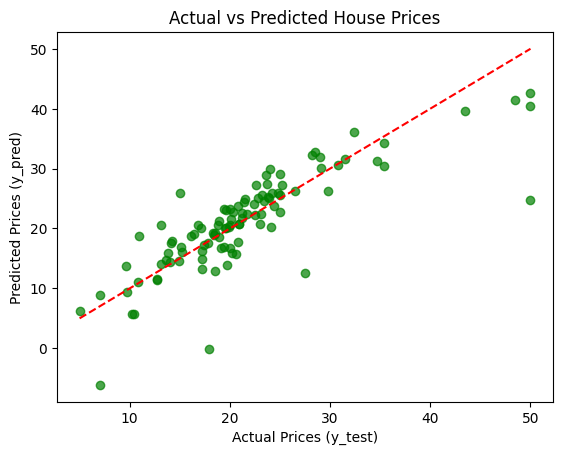

In [12]:
plt.scatter(y_test, y_pred, alpha = 0.7, color = 'green')  # plots the data points
#alpha parameter controls transparency of plotted points
plt.xlabel("Actual Prices (y_test)") #x axis label
plt.ylabel("Predicted Prices (y_pred)") #y axis label
plt.title("Actual vs Predicted House Prices") #heading of the graph
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()],
         'r--')  # 45° line (perfect predictions)
##NOTE: the red line plot goes from (min,min) to (max,max) in plt.plot which is the y = x line.
plt.show()

## explaining the visualization

In [13]:
# The red line is the perfect predictions line. Any data point lying on it is a 100% accurate prediction.
# The farther a point goes from this line, the more it is wrong.
# If points lie near the red dashed line → good fit.
# Large deviations → poor predictions.
# We will check evaluation metrics to verify this.

### scatter plot (residue vs predicted)

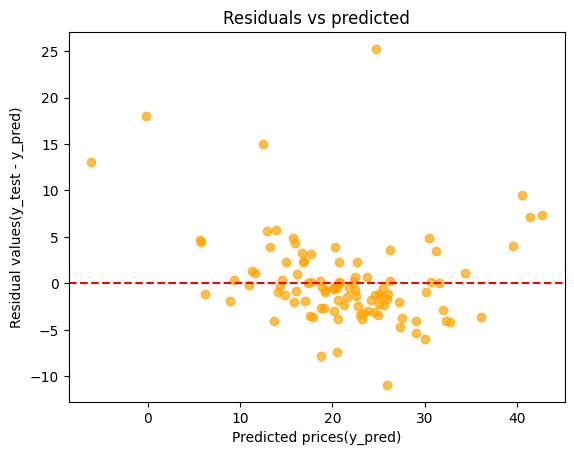

In [14]:
residuals = y_test - y_pred

plt.scatter(y_pred,residuals,alpha = 0.7, color='orange')
plt.axhline(y=0, color="red", linestyle="--") #axis horizontal lilne at y = 0
plt.xlabel('Predicted prices(y_pred)')
plt.ylabel('Residual values(y_test - y_pred)')
plt.title('Residuals vs predicted')
plt.show()

## Explaining the visualization

In [15]:
# Ideally → residuals look like random noise around 0. (minimising y - y_pred)
# Patterns/trends → linear regression may not be the best fit.

### histogram of residuals

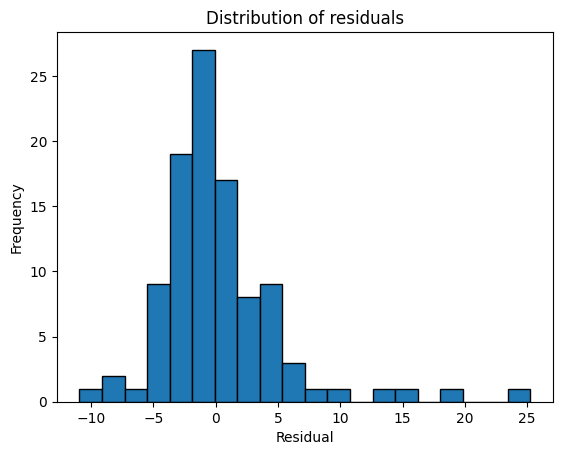

In [16]:
# check is residuals are roughly normally distributed (assumption of linear regression)
# Curve should look bell-shaped (not skewed)
plt.hist(residuals, bins=20, edgecolor="black")
plt.xlabel("Residual")
plt.ylabel('Frequency')
plt.title('Distribution of residuals')
plt.show()

# Evaluate performance

In [17]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MSE: 24.291119474973538
RMSE: 4.928602182665339
R²: 0.6687594935356317
